In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

<b style="color:lightgreen"><i>Data Exploration and Cleaning</i></b>

In [3]:
df = pd.read_csv("telcom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df1 = df.drop(['customerID'], axis=1)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
def unique_data_in_each_col(df):
    for columns in df:
        if df[columns].dtypes == object:
            print(f'{columns}: {df[columns].unique()}') 
        
unique_data_in_each_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [7]:
df1.gender.replace({'Female':0, 'Male':1}, inplace=True)
df1.gender

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int64

In [8]:
df1.replace({'No internet service':'No', 'No phone service':'No'}, inplace=True)
unique_data_in_each_col(df1)

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [9]:
colm_y_n = ['Partner', 'Dependents', 'PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in colm_y_n:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

In [10]:
unique_data_in_each_col(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [11]:
df1.TotalCharges= pd.to_numeric(df1.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [12]:
# from the above cell we get to know that, some of the value in TotalCharges column is filled with " " string. So, first we are going to make them NaN using the below command, then we will remove the rows with NaN value
df1.TotalCharges= pd.to_numeric(df1.TotalCharges, errors='coerce')

In [13]:
df2 = df1[~df1.TotalCharges.isnull()]

In [14]:
df2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
unique_data_in_each_col(df2)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [16]:
df3 = pd.get_dummies(data=df2, columns=['InternetService','Contract','PaymentMethod'], drop_first=True)

In [17]:
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


In [18]:
df3.shape

(7032, 24)

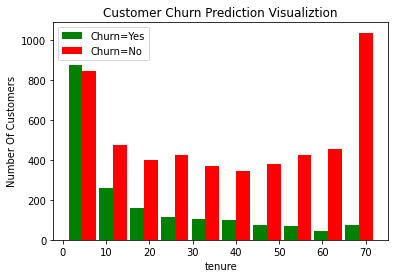

In [19]:
tenure_churn_no = df2[df2.Churn==0].tenure
tenure_churn_yes = df2[df2.Churn==1].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.90, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

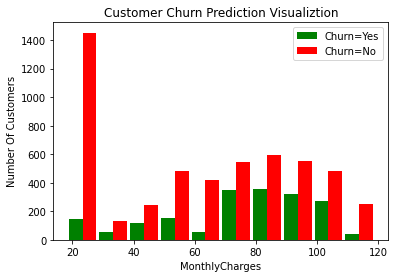

In [20]:
monthly_charges_churn_no = df2[df2.Churn==0].MonthlyCharges
monthly_charges_churn_yes = df2[df2.Churn==1].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], rwidth=0.90, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

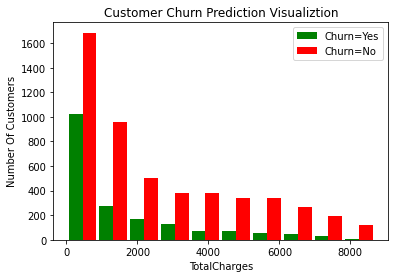

In [21]:
total_charges_churn_no = df2[df2.Churn==0].TotalCharges
total_charges_churn_yes = df2[df2.Churn==1].TotalCharges

plt.xlabel("TotalCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([total_charges_churn_yes, total_charges_churn_no], rwidth=0.90, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [22]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [23]:
x = df3.drop('Churn', axis=1).values
y = df3.Churn.values

In [24]:
x.shape

(7032, 23)

In [25]:
y.shape

(7032,)

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [27]:
x_train.shape

(5625, 23)

In [28]:
x_test.shape

(1407, 23)

In [29]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 0.]])

In [30]:
x_train.shape

(5625, 23)

In [31]:
y_train.shape

(5625,)

In [32]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(23,), activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 2s 5ms/step - loss: 0.5512 - binary_accuracy: 0.7198
Epoch 2/50
176/176 [==============================] - 1s 7ms/step - loss: 0.4400 - binary_accuracy: 0.7915
Epoch 3/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4249 - binary_accuracy: 0.7996
Epoch 4/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4198 - binary_accuracy: 0.8053
Epoch 5/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4168 - binary_accuracy: 0.8053
Epoch 6/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4158 - binary_accuracy: 0.8053
Epoch 7/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4143 - binary_accuracy: 0.8052
Epoch 8/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4123 - binary_accuracy: 0.8052
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4116 - binary_accuracy: 0.8068
Epoch 10/50
176/176 [================

In [33]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4578 - binary_accuracy: 0.7783


[0.4577904939651489, 0.778251588344574]

In [34]:
y_pred=model.predict(x_test)

44/44 [==============================] - 0s 3ms/step


In [35]:
y_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
y_pred

array([[0.01567247],
       [0.07874244],
       [0.69906753],
       ...,
       [0.033925  ],
       [0.3331115 ],
       [0.00250556]], dtype=float32)

In [37]:
yp=[]
for val in y_pred:
    if (val>=0.5):
        yp.append(1)
    else:
        yp.append(0)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, yp))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(33.0, 0.5, 'Predicted value')

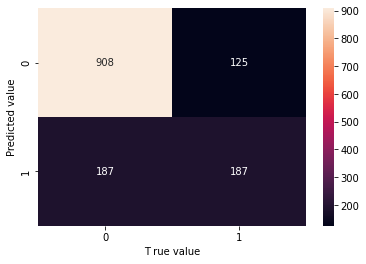

In [39]:
import seaborn as sb

cm = confusion_matrix(y_test, yp)
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('T rue value')
plt.ylabel('Predicted value')

In [40]:
"""
TN = 919     FN = 114
FP = 197     TP = 177

Precision: How precisily the values are predicted
    for 0: (predicted zero truely)/(total zeros in true) = (919)/(919 + 197) = 0.82
    for 1: (predicted one truely)/(total one in true) = (177)/(177 + 114) = 0.61

Recall: How Much of the values are being recalled
    for 0: (predicted zero truely)/(total zeros in predicted) = (919)/(919 + 114) = 0.89
    for 1: (predicted one truely)/(total one in predicted) = (177)/(177 + 197) = 0.47
    
"""

'\nTN = 919     FN = 114\nFP = 197     TP = 177\n\nPrecision: How precisily the values are predicted\n    for 0: (predicted zero truely)/(total zeros in true) = (919)/(919 + 197) = 0.82\n    for 1: (predicted one truely)/(total one in true) = (177)/(177 + 114) = 0.61\n\nRecall: How Much of the values are being recalled\n    for 0: (predicted zero truely)/(total zeros in predicted) = (919)/(919 + 114) = 0.89\n    for 1: (predicted one truely)/(total one in predicted) = (177)/(177 + 197) = 0.47\n    \n'